# What is Machine learning
"Machine learning (ML) is a branch of artificial intelligence (AI) and computer science that focuses on the using data and algorithms to enable AI to imitate the way that humans learn, gradually improving its accuracy" IBM

### Supervised Learning

is defined by its use of labeled datasets to train algorithms to classify data or predict outcomes accurately. As input data is fed into the model, the model adjusts its weights until it has been fitted appropriately. 

### Unsupervised Learning
"  uses machine learning algorithms to analyze and cluster unlabeled datasets (subsets called clusters). These algorithms discover hidden patterns or data groupings without the need for human intervention. This method’s ability to discover similarities and differences in information make it ideal for exploratory data analysis, cross-selling strategies, customer segmentation, and image and pattern recognition " IBM

#### Types of supervised Learning
- Classification: Target variable consist of categories. Weather a bank transaction its fraud or not
- Regression : Target a variable is continuous. Example: the price of appartments in LA with the size and number of bedrooms

- **Feature**       =  preditor variable   = idependent variable 
- **Target variable** = response variable  = dependent variable

#####  Before you use supervised learning
- Requirements
    - No missing values
    - Data numeric Format
    - Data stored in Pandas Dataframe or Numpy array

 - Perform a Exploratory Data Analyst (EDA) first


 #### Scikit-learn syntax
 ~~~
from sklearn.module import Model
model = Model()
model.fit (X_train,y_train) #label data
predictions = model.predict (X_test)  #prediction=y_test,   X_test = unlabel data
print(predictions)
 ~~~

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode
import seaborn as sns
#music_clean
#telecom_churn_clean
#diabetes_clean
#advertising_and_sales_clean

In [3]:
churn_df=pd.read_csv("data/telecom_churn_clean.csv") ;churn_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
minutes_columns = ["total_day_minutes", "total_eve_minutes", "total_night_minutes","total_intl_minutes"]
calls_columns = ["total_day_calls", "total_eve_calls", "total_night_calls","total_intl_calls"]
charges_columns = ["total_day_charge", "total_eve_charge", "total_night_charge","total_intl_charge"]
minutes = churn_df[minutes_columns]
minutes = pd.melt(minutes, var_name='variable', value_name='value')
charges=churn_df[charges_columns]
charges = pd.melt(charges, var_name='variable', value_name='value')
calls=churn_df[calls_columns]
calls = pd.melt(calls, var_name='variable', value_name='value')

In [6]:
minutes.head()

,variable,value
0,total_day_minutes,265.1
1,total_day_minutes,161.6
2,total_day_minutes,243.4
3,total_day_minutes,299.4
4,total_day_minutes,166.7


# EDA

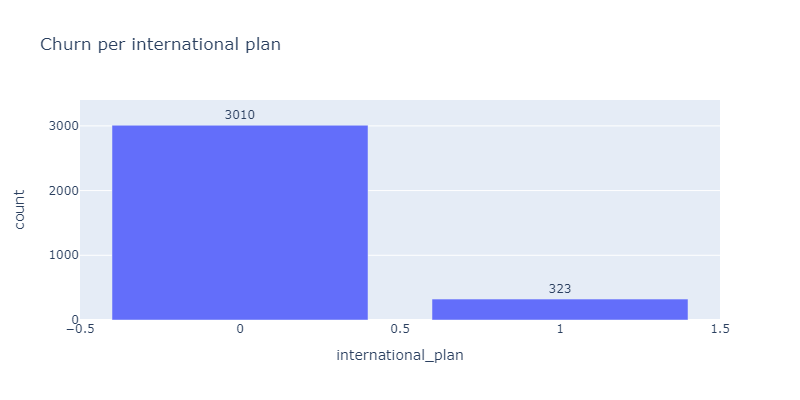

In [7]:
international_graph = churn_df.groupby('international_plan').size().reset_index(name='count')
fig = px.bar(international_graph,
             x = 'international_plan', y = 'count', title = 'Churn per international plan')
fig.update_layout(width=800, height=400)  
fig.update_traces(text=international_graph['count'], textposition='outside')
fig.update_yaxes(range=[0, 3400]) 
fig.show("png")

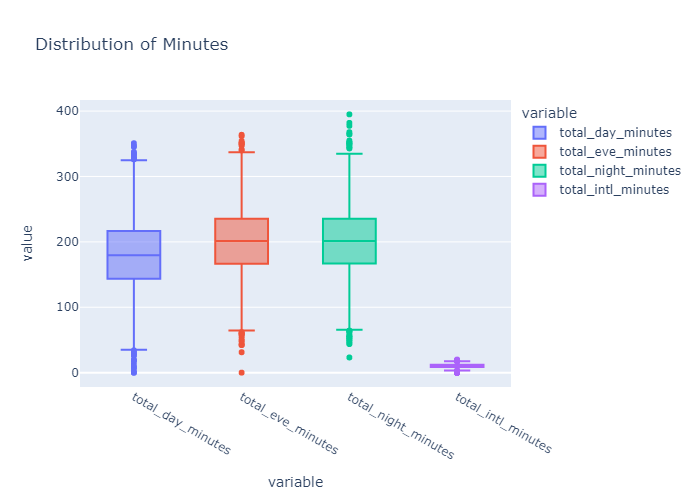

In [8]:
fig = px.box(minutes, 
             x = 'variable',y='value', 
             title = 'Distribution of Minutes',
             orientation = 'v',
             color = 'variable')
fig.show("png")

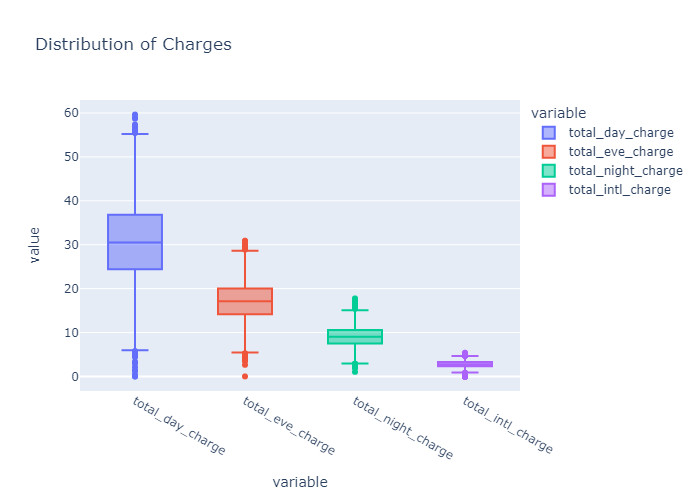

In [9]:
fig = px.box(charges, 
             x = 'variable',y='value', 
             title = 'Distribution of Charges',
             orientation = 'v',
             color = 'variable')
fig.show("png")

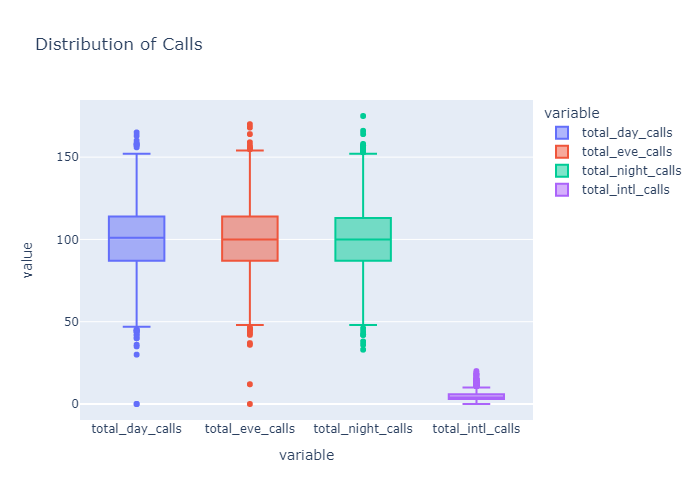

In [10]:
fig = px.box(calls, 
             x = 'variable',y='value', 
             title = 'Distribution of Calls',
             orientation = 'v',
             color = 'variable')
fig.show("png")

# Supervised Clasification

In [11]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [12]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

In [13]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))   

Predictions: [0 1 0]


This indicates that maybe there is a correlation between the number of service calls with the churn

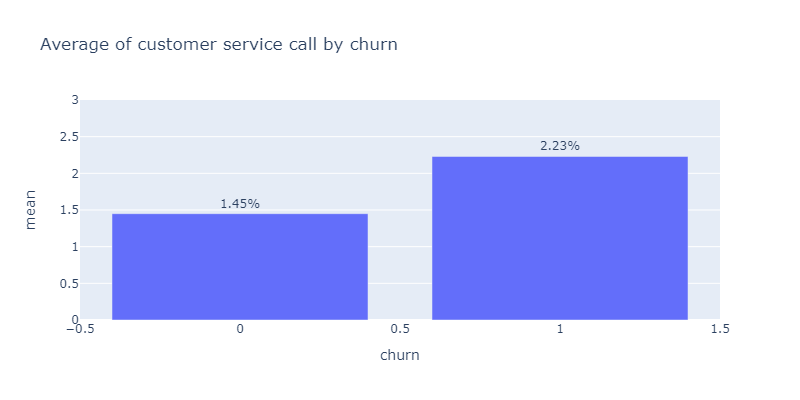

In [14]:
churn_service_graph = churn_df.groupby('churn')["customer_service_calls"].mean().reset_index(name='mean')
fig = px.bar(churn_service_graph,
             x = 'churn', y = 'mean', title = 'Average of customer service call by churn')
fig.update_layout(width=800, height=400)  
fig.update_traces(text=churn_service_graph['mean'], textposition='outside',texttemplate='%{text:.2f}%')
fig.update_yaxes(range=[0, 3]) 
fig.show("png")

its seems that our hypotesis was right

### Measuring model performance (Accuracy, Precision, Recall, and F1 Score)

These are key metrics used to evaluate classification models.

### Formulas

- **Accuracy:** Measures overall correctness.
$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

- **Precision:** Measures accuracy of positive predictions.
$$ Precision = \frac{TP}{TP + FP} $$

- **Recall:** Measures ability to capture positive instances.
$$ Recall = \frac{TP}{TP + FN} $$

- **F1 Score:** Harmonic mean of precision and recall.
$$ F1 = \frac{2 \times Precision \times Recall}{Precision + Recall} $$


### Conclusion
- **Accuracy:** General correctness.
- **Precision:** Accuracy of positive predictions.
- **Recall:** Capture rate of positive instances.
- **F1 Score:** Balance between precision and recall.

A good model balances high accuracy, precision, recall, and F1 score based on specific needs.


In [15]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8740629685157422


We have an accuracy of 87%, pretty good

### Overfitting and underfitting


Interpreting model complexity is a great way to evaluate supervised learning performance. Our aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

In [16]:
import pandas as pd

# Crear una lista para almacenar los resultados
results = []

# Create neighbors
neighbors = np.arange(1, 13)

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)
    
    # Agregar los resultados a la lista
    results.append({'Neighbor': neighbor, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy})

# Crear el DataFrame a partir de la lista de resultados
df = pd.DataFrame(results)

display(df)


,Neighbor,Train Accuracy,Test Accuracy
0,1,1.000000,0.794603
1,2,0.903601,0.860570
2,3,0.911478,0.850075
3,4,0.894599,0.869565
4,5,0.895349,0.874063
5,6,0.889347,0.865067
6,7,0.888597,0.871064
7,8,0.886347,0.863568
8,9,0.887097,0.872564
9,10,0.884096,0.866567


Notice how training accuracy decreases as the number of neighbors initially gets larger, and vice versa for the testing accuracy?

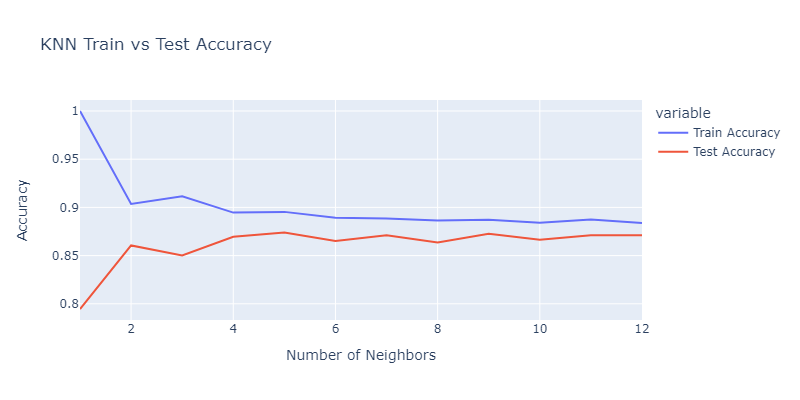

In [17]:
import plotly.express as px

# Create the plot using Plotly Express
fig = px.line(df, x='Neighbor', y=['Train Accuracy', 'Test Accuracy'],
              title='KNN Train vs Test Accuracy',
              labels={'Neighbor': 'Number of Neighbors', 'value': 'Accuracy'})

# Update the layout with the specified width and height
fig.update_layout(width=800, height=400)

# Show the plot
fig.show("png")


it seems that the optimal number of neighborns its like 6-8

#  Supervised: Regresion

 In regression tasks, the target variable typically has continuous values, such as a country's GDP, or the price of a house.

 let's use a dataset containing women's health data to predict blood glucose levels.

we will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign.

https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset

In [18]:
sales_df=pd.read_csv("data/Advertising Budget and Sales.csv") ; sales_df.drop("Unnamed: 0",axis=1,inplace=True)

we will use the advertising expenditure as features to predict sales values, initially working with the "radio" column and sales

In [19]:
sales_df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


However, before we make any predictions we will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

In [20]:
# Create X from the radio column's values
X = sales_df["Radio Ad Budget ($)"].values

# Create y from the sales column's values
y = sales_df["Sales ($)"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(200, 1) (200,)


In [21]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[16.96597871 17.26972238 18.60619455 17.67471395 11.49859256]


See how sales values for the first five predictions range from $95,000 to over $290,000. Let's visualize the model's fit.

In [22]:
X

array([[37.8],
       [39.3],
       [45.9],
       [41.3],
       [10.8],
       [48.9],
       [32.8],
       [19.6],
       [ 2.1],
       [ 2.6],
       [ 5.8],
       [24. ],
       [35.1],
       [ 7.6],
       [32.9],
       [47.7],
       [36.6],
       [39.6],
       [20.5],
       [23.9],
       [27.7],
       [ 5.1],
       [15.9],
       [16.9],
       [12.6],
       [ 3.5],
       [29.3],
       [16.7],
       [27.1],
       [16. ],
       [28.3],
       [17.4],
       [ 1.5],
       [20. ],
       [ 1.4],
       [ 4.1],
       [43.8],
       [49.4],
       [26.7],
       [37.7],
       [22.3],
       [33.4],
       [27.7],
       [ 8.4],
       [25.7],
       [22.5],
       [ 9.9],
       [41.5],
       [15.8],
       [11.7],
       [ 3.1],
       [ 9.6],
       [41.7],
       [46.2],
       [28.8],
       [49.4],
       [28.1],
       [19.2],
       [49.6],
       [29.5],
       [ 2. ],
       [42.7],
       [15.5],
       [29.6],
       [42.8],
       [ 9.3],
       [24

In [23]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [24]:
X.flatten()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4, 27.7,  8.4,
       25.7, 22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8,
       49.4, 28.1, 19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3,
       24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 24.6, 43.7,  1.6,
       28.5, 29.9,  7.7, 26.7,  4.1, 20.3, 44.5, 43. , 18.4, 27.5, 40.6,
       25.5, 47.8,  4.9,  1.5, 33.5, 36.5, 14. , 31.6,  3.5, 21. , 42.3,
       41.7,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,  0.4, 26.9,
        8.2, 38. , 15.4, 20.6, 46.8, 35. , 14.3,  0.8, 36.9, 16. , 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. , 39.6,  2.9,
       27.2, 33.5, 38.6, 47. , 39. , 28.9, 25.9, 43.9, 17. , 35.4, 33.2,
        5.7, 14.8,  1.9,  7.3, 49. , 40.3, 25.8, 13

In [25]:
# Create DataFrame with X, y, and predictions
df = pd.DataFrame({'X': X.flatten(), 'y': y, 'predictions': predictions})

In [26]:
df.head()

,X,y,predictions
0,37.8,22.1,16.965979
1,39.3,10.4,17.269722
2,45.9,9.3,18.606195
3,41.3,18.5,17.674714
4,10.8,12.9,11.498593


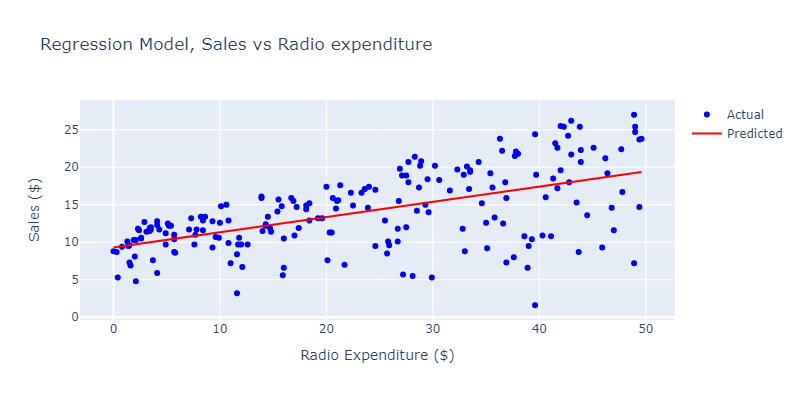

In [27]:
import plotly.graph_objects as go
# Create scatter plot trace
scatter_trace = go.Scatter(x=df['X'], y=df['y'], mode='markers', name='Actual', marker=dict(color='blue'))

# Create line plot trace
line_trace = go.Scatter(x=df['X'], y=df['predictions'], mode='lines', name='Predicted', line=dict(color='red'))

# Create layout
layout = go.Layout(title='Regression Model, Sales vs Radio expenditure',
                   xaxis=dict(title='Radio Expenditure ($)'),
                   yaxis=dict(title='Sales ($)'))

# Create figure
fig = go.Figure(data=[scatter_trace, line_trace], layout=layout)

# Update the layering to ensure the line is in front
fig.update_layout(yaxis=dict(layer='above traces'))
fig.update_layout(width=800, height=400)  
# Show the plot
fig.show("png")


The model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales! Now let's take a look at what is going on under the hood to calculate this relationship.

Now we will do it with the complete dataset

In [28]:
sales_df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
sales_df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
# Create X and y arrays
X = sales_df.drop("Sales ($)", axis=1).values
y = sales_df["Sales ($)"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [16.5653963  21.18822792], Actual Values: [16.9 22.4]


The first two predictions appear to be within around 5% of the actual values from the test set!

In [32]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.8609466508230367
RMSE: 1.9485372043446394


## Cross validation

In [33]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X_train, y_train, cv=kf)

# Print scores
print(cv_scores)

[0.9102168  0.91121748 0.77755817 0.93529472 0.89307047 0.93112439]


## Confidence interval

In [34]:
from scipy import stats

# Calculate the mean and standard error of the mean
mean_score = np.mean(cv_scores)
sem = stats.sem(cv_scores)

# Calculate the 95% confidence interval
ci = stats.t.interval(0.95, len(cv_scores) - 1, loc=mean_score, scale=sem)

# Print the mean and the 95% confidence interval
print("Mean:", mean_score)
print("95% Confidence Interval:", ci)

Mean: 0.8930803388763157
95% Confidence Interval: (0.8315340199048161, 0.9546266578478152)


## Regularization

Recall that fitting a linear regression model minimizes a loss function to choose a coefficient, a, for each feature, and the intercept, b. If we allow these coefficients to be very large, we can get overfitting. Therefore, it is common practice to alter the loss function so that it penalizes large coefficients. This is called regularization.

### Ridge regresion

Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this example, we will fit ridge regression models over a range of different alpha values, and print their 
 scores. we will use all of the features in the sales_df dataset to predict "sales".

A variable called alphas has been provided as a list containing different alpha values, which we will loop through to generate scores.

In [35]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.8609470367537362, 0.8609505096450262, 0.8609851905762931, 0.8613272352092608, 0.8643028128477264, 0.86907923489593]


the scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!

### Laso Regression

[ 0.04572679  0.18663528 -0.        ]


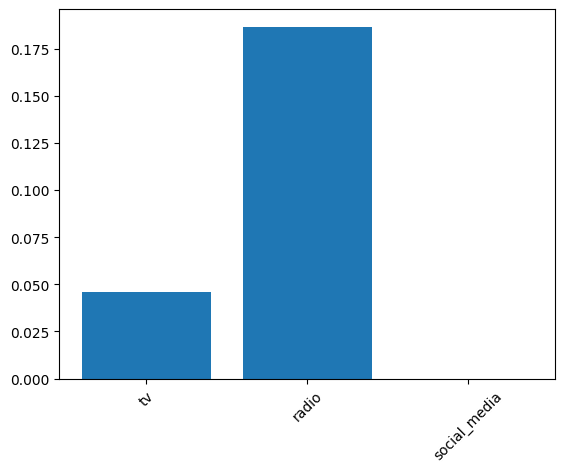

In [36]:
# Import Lasso
from sklearn.linear_model import Lasso
sales_columns=['tv', 'radio', 'social_media']
# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

See how the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values! 

# Fine Tunning the model

this time we'll work with the diabetes_df dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

In [37]:
diabetes_df=pd.read_csv("data/diabetes_clean.csv") 

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [38]:
diabetes_df.sample(5)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
604,4,183,0,0,0,28.4,0.212,36,1
135,2,125,60,20,140,33.8,0.088,31,0
751,1,121,78,39,74,39.0,0.261,28,0
121,6,111,64,39,0,34.2,0.260,24,0
407,0,101,62,0,0,21.9,0.336,25,0


<Figure size 800x600 with 0 Axes>

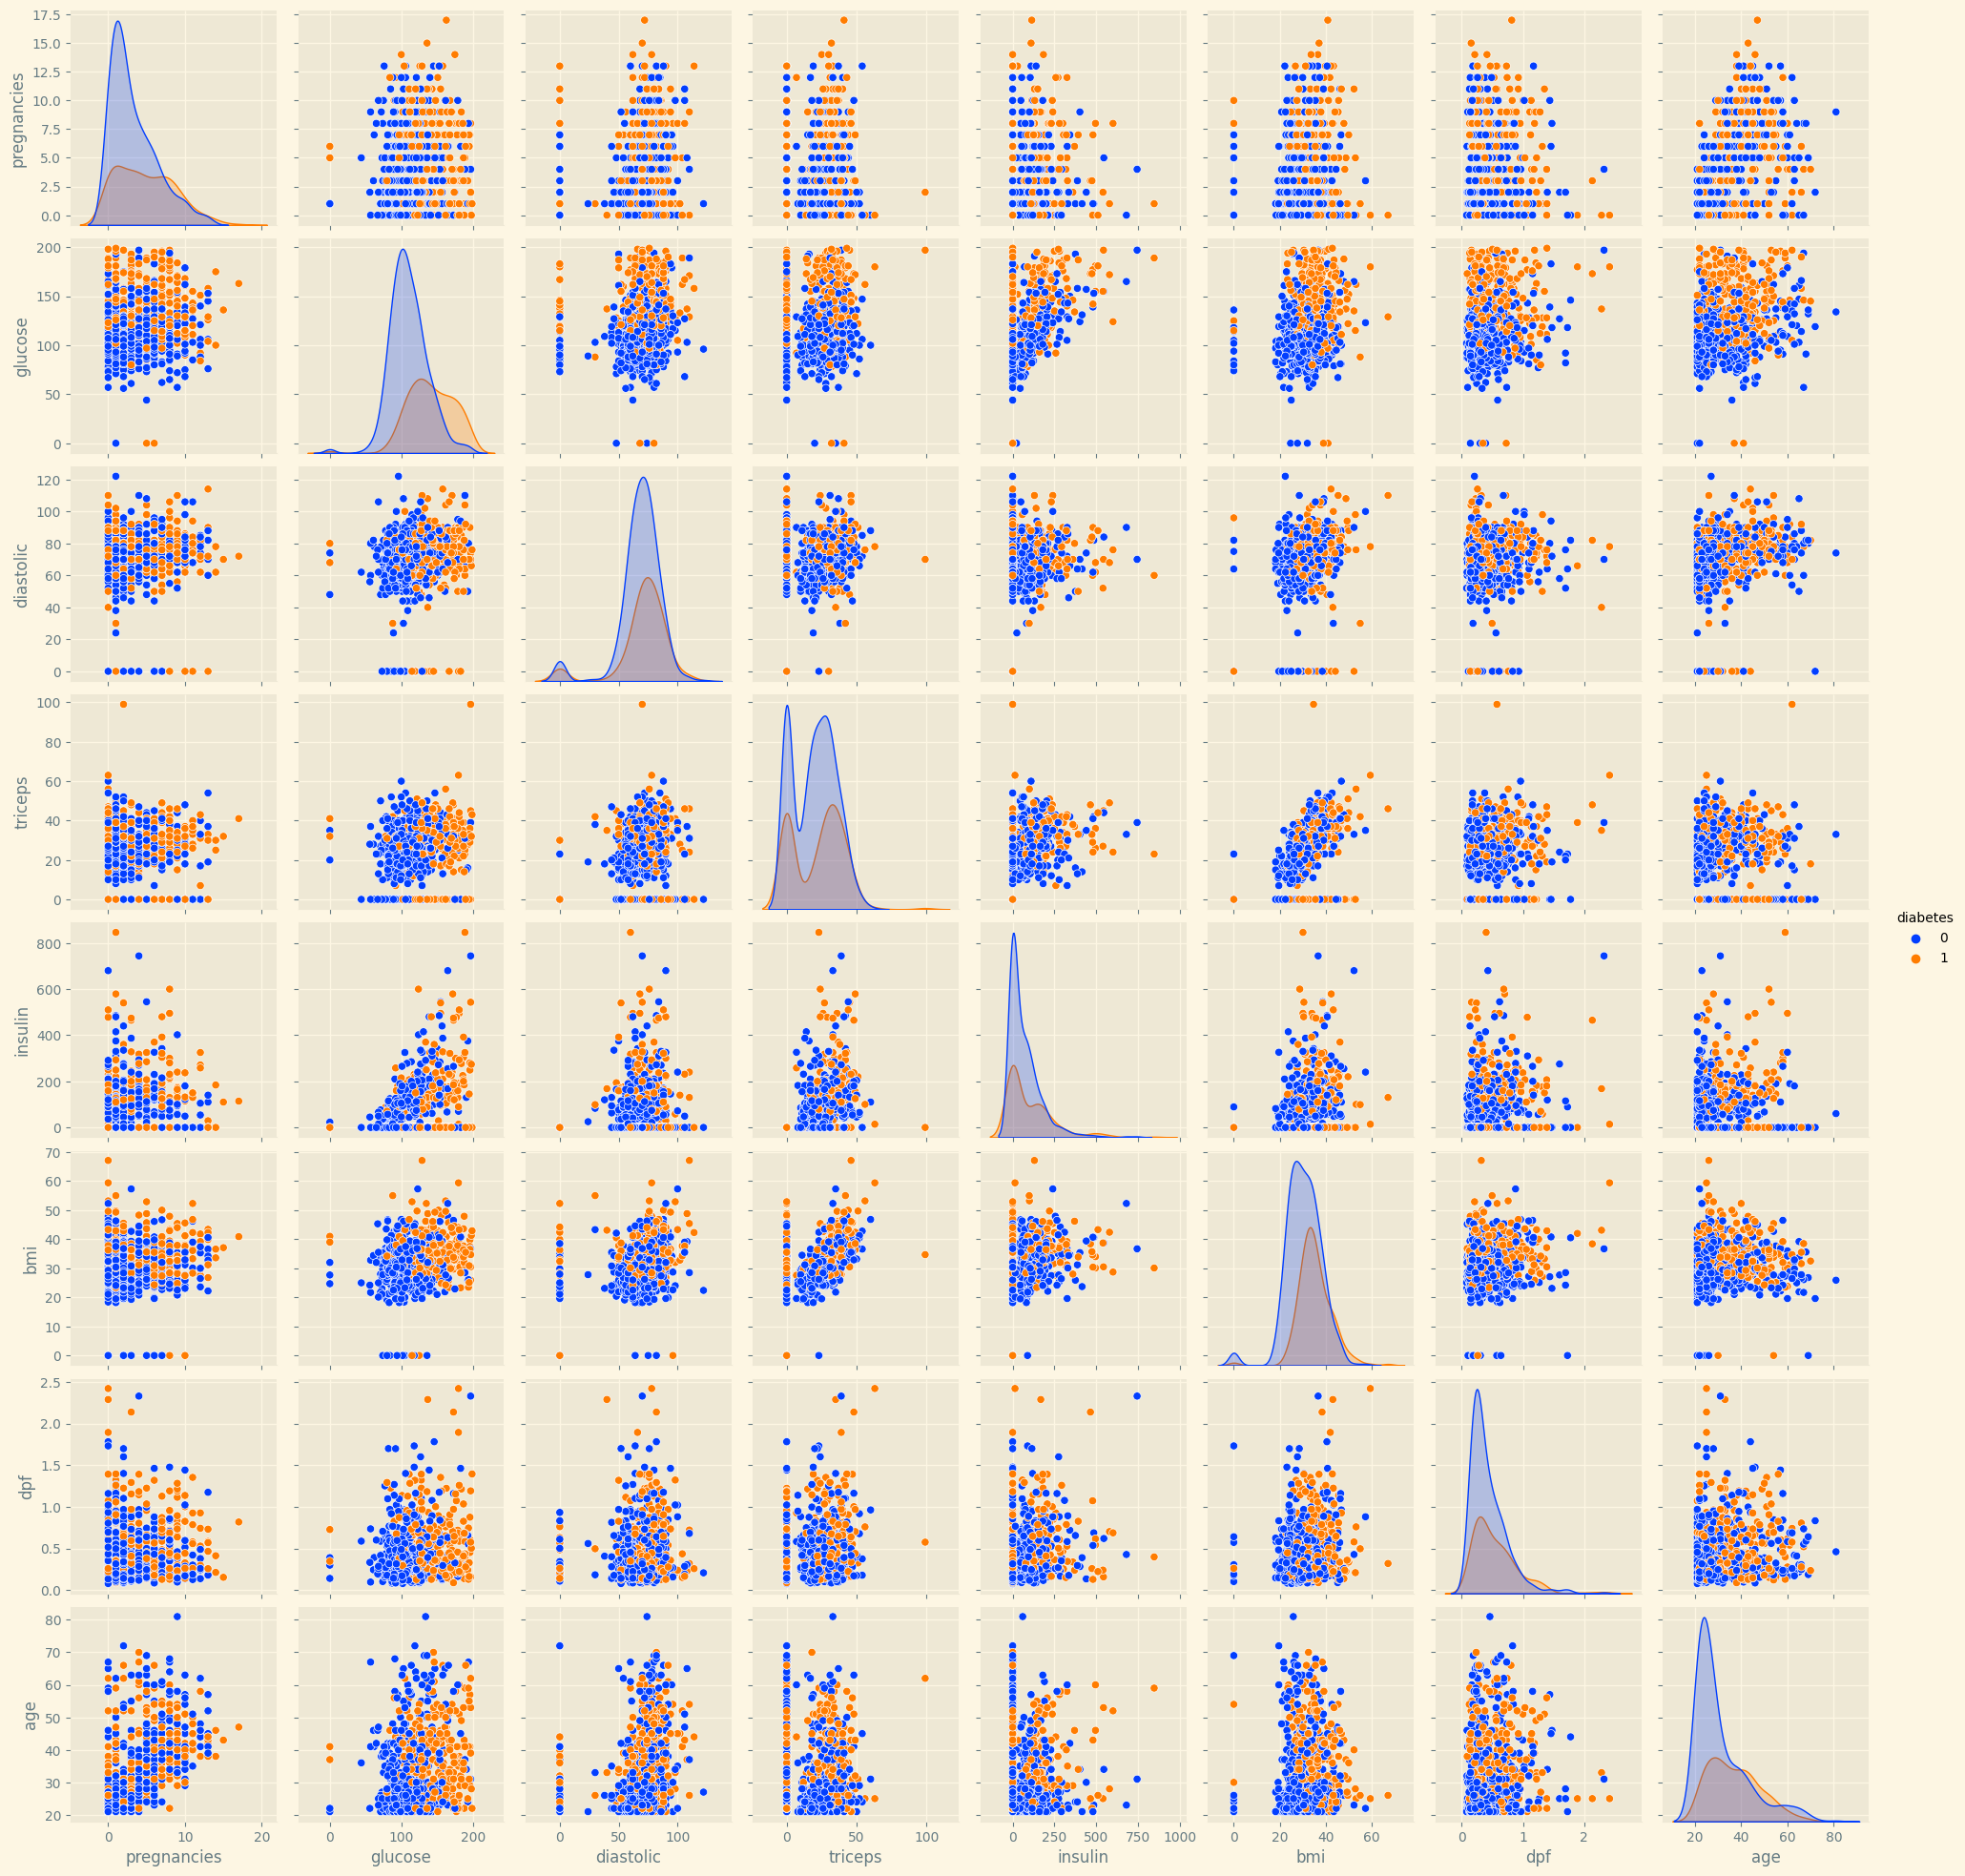

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  
plt.style.use('Solarize_Light2')
sns.pairplot(data=diabetes_df, hue="diabetes", palette='bright')
plt.show()


- Its easy to see how High glucose its related with diabetes
- pregnancies not seets to have a relationshit
- The age seems to be normal for the ones who diabetes, but whose dont have diabetes, appear to be younger

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). 

Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

In [40]:
X=diabetes_df.drop("diabetes",axis=1)
y=diabetes_df["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix 

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



 The model produced 38 true positives and 27 false positives, meaning precision was 58%, which is confirmed in the classification report. 
 
 The output also shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

## Bulding a regresson model

In [42]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(max_iter=1000)
# Fit the model
logreg.fit(X_train,y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.26655418 0.19014936 0.12359952 0.14564783 0.50457808 0.45331397
 0.01327982 0.59609981 0.56325332 0.79991791]


Notice how the probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.01 to 0.79. Now let's plot the ROC curve to visualize performance using different thresholds.

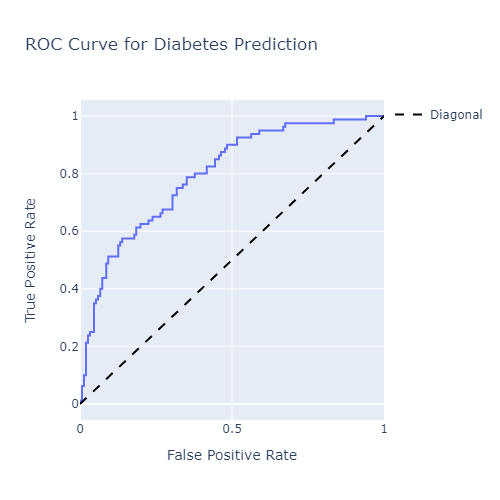

In [43]:
import plotly.express as px
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Create a DataFrame for the ROC curve data
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

# Plot the ROC curve
fig = px.line(roc_df, x='False Positive Rate', y='True Positive Rate', title='ROC Curve for Diabetes Prediction',
              labels={'False Positive Rate': 'False Positive Rate', 'True Positive Rate': 'True Positive Rate'})

# Add diagonal line
fig.add_scatter(x=[0, 1], y=[0, 1], mode='lines', name='Diagonal', line=dict(color='black', dash='dash'))
fig.update_layout(width=500, height=500)  
# Show the plot
fig.show("png")


The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

In [44]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.7966059602649006
[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



## Hyperparameter tunning

### Gridsearch

In [45]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object


X=diabetes_df.drop("diabetes",axis=1)
y=diabetes_df["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lasso = Lasso(alpha=0.3)
kf = KFold(n_splits=6, shuffle=True, random_state=5)
# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train,y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 0.10527210526315789}
Tuned lasso score: 0.2905288091394486


Unfortunately, the best model only has an R-squared score of 0.33, highlighting that using the optimal hyperparameters does not guarantee a high performing model!

## Hyperparameter tuning with RandomizedSearchCV


In [46]:
# Create the parameter space
from sklearn.model_selection import RandomizedSearchCV

params = {
    "penalty": ["l1", "l2"],
    "tol": np.linspace(0.0001, 1.0, 50),
    "C": np.linspace(0.1, 1.0, 50),
    "class_weight": ["balanced", {0:0.8, 1:0.2}],
    "solver": ['liblinear', 'saga']  # Solvers complatible with 'l1'  regularization
}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'tol': 0.10213061224489796, 'solver': 'saga', 'penalty': 'l1', 'class_weight': {0: 0.8, 1: 0.2}, 'C': 0.5224489795918368}
Tuned Logistic Regression Best Accuracy Score: 0.6499167707032876


Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set!

# Preprocessing and pipelines

Recall that scikit-learn requires numeric data, with no missing values. All the data that we have used so far has been in this format. 

However, with real-world data, this will rarely be the case, and instead we need to preprocess our data before we can build model

Say we have a dataset containing categorical features, such as color. As these are not numeric, scikit-learn will not accept them and we need to convert them into numeric features. We achieve this by splitting the feature into multiple binary features called dummy variables, one for each category. Zero means the observation was not that category, while one means it was.

In [47]:
music_df=pd.read_csv("data/music_clean.csv") 

In [48]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df,drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 13)


### Regression with categorical features


In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
# Create X and y
X = music_dummies.drop("popularity",axis=1)
y = music_dummies["popularity"]

ridge = Ridge(alpha=0.2)
kf = KFold(n_splits=6, shuffle=True, random_state=5)
# Perform cross-validation
scores = cross_val_score(ridge,X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 10.008678539955676
Standard Deviation of the target array: 14.02156909907019


An average RMSE of approximately 10 is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.

## Handling missing data

https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset

In [50]:
music_df=pd.read_csv("data/spotify-tracks-dataset.csv") ; music_df.drop("Unnamed: 0",axis=1,inplace=True)

In [51]:
x=music_df.track_genre.value_counts()

In [52]:
x=pd.DataFrame(x)
x=x.reset_index()
x.columns=["Genre","counts"]

In [53]:
x.sample(10)

,Genre,counts
103,gospel,1000
74,cantopop,1000
32,trip-hop,1000
16,malay,1000
6,piano,1000
93,heavy-metal,1000
52,rock,1000
17,latino,1000
102,goth,1000
82,ambient,1000


In [54]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

track_id            0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
mode                0
loudness            0
key                 0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
time_signature      0
track_genre         0
track_name          1
album_name          1
artists             1
dtype: int64
Shape of the `music_df`: (114000, 20)


In [55]:
music_df[music_df["track_genre"]=="rock"]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
91000,7DbdUf8aHSYoliSjO6LZv6,Beach Weather,Chit Chat,"Sex, Drugs, Etc.",90,196784,False,0.572,0.839,4,-5.083,0,0.0377,0.0130,0.009760,0.5220,0.465,143.969,4,rock
91001,5XeFesFbtLpXzIVDNQP22n,Arctic Monkeys,AM,I Wanna Be Yours,92,183956,False,0.464,0.417,0,-9.345,0,0.0256,0.1360,0.022000,0.0974,0.479,67.528,4,rock
91002,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.0495,0.017700,0.1010,0.398,124.053,4,rock
91003,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,0,-5.927,1,0.0475,0.0826,0.000745,0.0546,0.825,139.994,4,rock
91004,1rDjwexewf4hrdZT7SRNsH,Faridkot;Amar Jalal,Nasha (Equals Sessions) - Single,Nasha (Equals Sessions),70,287573,False,0.780,0.460,6,-7.516,1,0.0851,0.4550,0.000141,0.0610,0.788,124.007,4,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,5J5VBW8G9ViJfzX5FEYvni,Tom Petty and the Heartbreakers,Christmas Eve At Home,Christmas All Over Again,0,253626,False,0.440,0.838,9,-6.196,1,0.0423,0.0956,0.000000,0.4730,0.619,138.908,4,rock
91996,5nQqnfHX5cr2FsGszRtTpr,Tom Petty and the Heartbreakers,Christmas Best Hits 2022,Christmas All Over Again,0,253626,False,0.440,0.838,9,-6.196,1,0.0423,0.0956,0.000000,0.4730,0.619,138.908,4,rock
91997,0sL9GKpJKZRngHncF2r0Rg,Tom Petty and the Heartbreakers,Home At Christmas,Christmas All Over Again,0,253626,False,0.440,0.838,9,-6.196,1,0.0423,0.0956,0.000000,0.4730,0.619,138.908,4,rock
91998,6S70OrI0CsYO0nD1l6qvDP,Tom Petty and the Heartbreakers,All I Want For Christmas Is You,Christmas All Over Again,0,253626,False,0.440,0.838,9,-6.196,1,0.0423,0.0956,0.000000,0.4730,0.619,138.908,4,rock


In [56]:
music_df[music_df["track_genre"].isin([
"opera","rock"])].track_genre.value_counts()

opera    1000
rock     1000
Name: track_genre, dtype: int64

In [57]:
music_df.track_genre.value_counts()
music_df=music_df[music_df["track_genre"].isin(["opera","rock"])]
music_df.drop(["track_id","artists","album_name","track_name"],axis=1,inplace=True)
music_df["track_genre"] = np.where(music_df["track_genre"] == "rock", 1, 0)


In [58]:
music_df.track_genre.value_counts()

0    1000
1    1000
Name: track_genre, dtype: int64

In [59]:

# Remove values where less than 5% are missing
#music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])


we will predict whether a song is of the "Rock" genre.

The dataset has gone from 1000 observations down to 867, but it is now in the correct format for binary classification and the remaining missing values can be imputed as part of a pipeline.

Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

In [60]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

X=music_df.drop("track_genre",axis=1)
y=music_df["track_genre"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

In [61]:
# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[181 121]
 [ 90 208]]


## Centering and scaling


- Many machine learning models use some form of distance to inform them, 

- so if we have features on far larger scales, they can disproportionately influence our model. 

- For example, KNN uses distance explicitly when making predictions. 

- For this reason, we actually want features to be on a similar scale. 

- To achieve this, we can normalize or standardize our data, often referred to as scaling and centering.

In [62]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("Ridge", Ridge(alpha=0.01))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.6582896352220645


In [63]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('Ridge', Ridge(alpha=0.01))])

In [64]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.89875 
 {'logreg__C': 0.2113157894736842}


 Using a pipeline shows that a logistic regression model with "C" set to approximately 0.1 produces a model with 0.8425 accuracy!

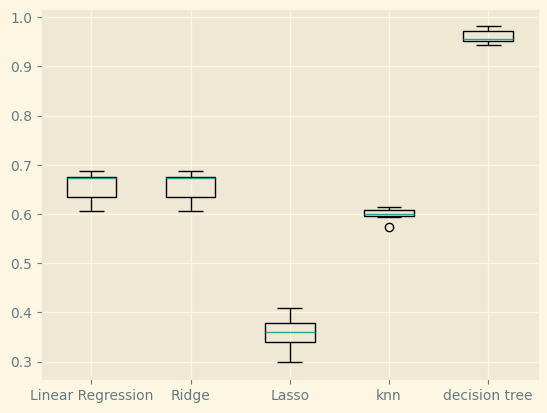

In [68]:
from sklearn.tree import DecisionTreeClassifier
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1),
          "knn":KNeighborsClassifier(),"decision tree":DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [ ]:
X_train_scaled

In [ ]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train, y_train, cv=kf)
  
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

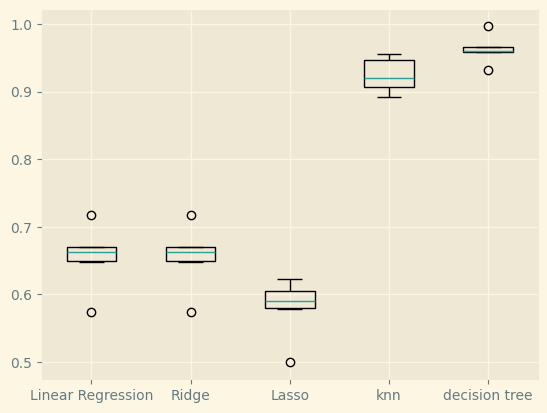

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Create models dictionary
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1),
          "knn":KNeighborsClassifier(),"decision tree":DecisionTreeClassifier()}
results = []

for model_name, model in models.items():
    # Define the pipeline with StandardScaler
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # StandardScaler
        ('model', model)  # Your model
    ])
    
    kf = KFold(n_splits=6, random_state=12, shuffle=True)
    
    # Perform cross-validation
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kf)
    
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

all the metrics seems to improve with the scalar

Finally we will build a pipeline to 
- impute missing values, 
- scale features, and 
- perform hyperparameter tuning of a logistic regression model. 

The aim is to find the best parameters and accuracy when predicting song genre!

In [73]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.223, 'logreg__solver': 'newton-cg'}, Accuracy: 0.9225
